In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from matplotlib import rc

rc('font', **{'family':'serif', 'serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

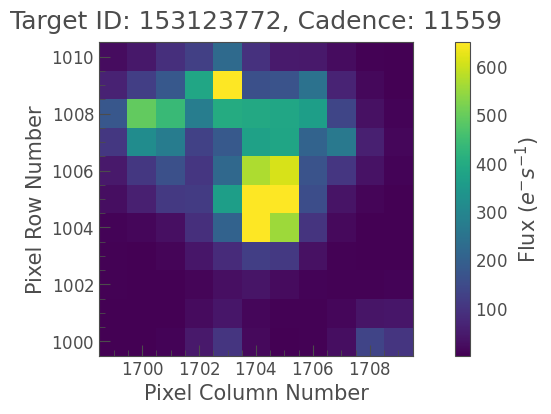

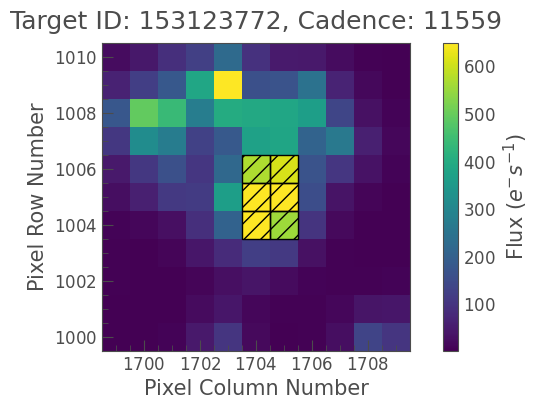

6


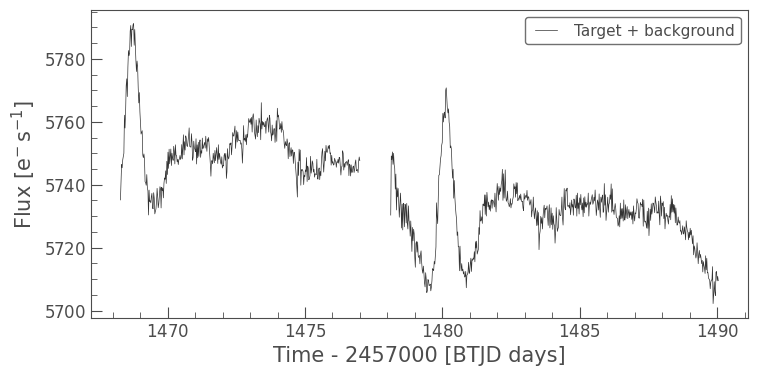

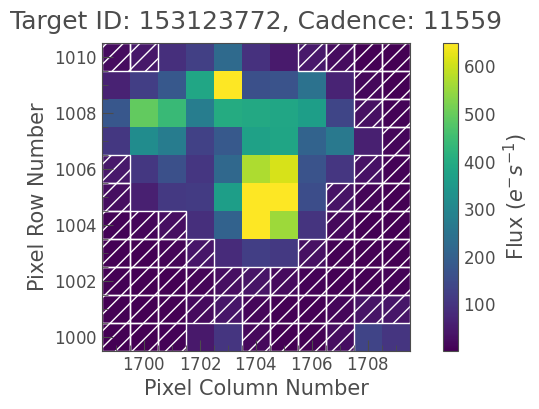

61


In [6]:
## SECTOR 6
tpf = lk.search_targetpixelfile('TIC 153123772', mission="TESS").download_all(quality_bitmask=195, flux_column='pdcsap_flux')
tpf[0].plot()
#plt.figure(figsize=(8,8))
fig = plt.gcf()
fig.tight_layout(pad=0.2)
fig.savefig('./sec6_1.jpg', dpi=200)
ns = 0
target_mask = tpf[ns].create_threshold_mask(threshold=5.04, reference_pixel='center')
plt.show(tpf[ns].plot(aperture_mask=target_mask, mask_color='k'))
n_target_pixels = target_mask.sum()
print(n_target_pixels)

target_lc = tpf[ns].to_lightcurve(aperture_mask=target_mask,) ## convert to light curve
plt.show(target_lc.plot(label='Target + background'))# plot its light curve
background_mask = ~tpf[ns].create_threshold_mask(threshold=0.001, reference_pixel=None)# estimating background
plt.show(tpf[ns].plot(aperture_mask=background_mask, mask_color='w') )
n_background_pixels = background_mask.sum()
print(n_background_pixels)

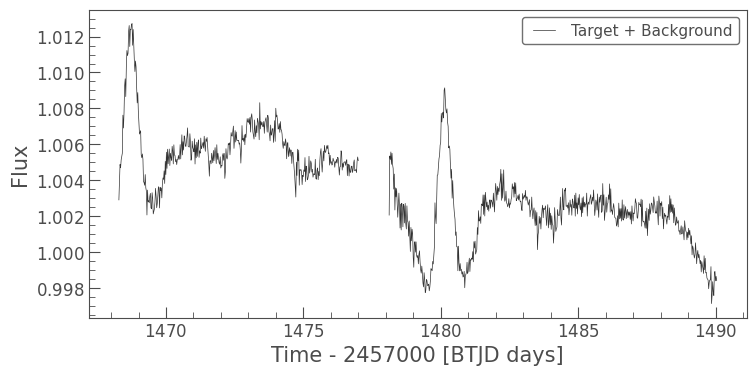

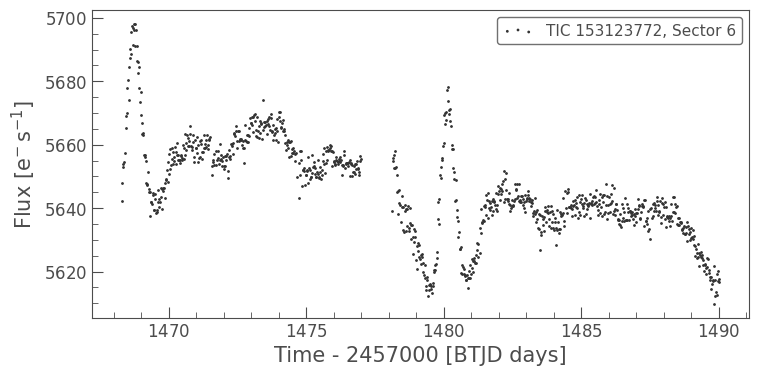

'\nprint(corrected_lc.time, corrected_lc.flux,corrected_lc.flux_err)\n'

In [7]:
from astropy.io import ascii

background_lc_per_pixel = tpf[ns].to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax =(target_lc / common_normalization).plot(normalize=False, label='Target + Background', markersize=4.0);
#(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
#                                                        ylabel='Normalized, shifted flux');
corrected_lc = target_lc - background_estimate_lc.flux
plt.show(corrected_lc.scatter(label='TIC 153123772, Sector 6'))
#background_estimate_lc.flux
#background_estimate_lc.time


ascii.write(corrected_lc['time',     'flux',     'flux_err'][:], 'Sector6SAPdata.dat', overwrite=True, format='no_header')
'''
print(corrected_lc.time, corrected_lc.flux,corrected_lc.flux_err)
'''

<Figure size 640x480 with 0 Axes>

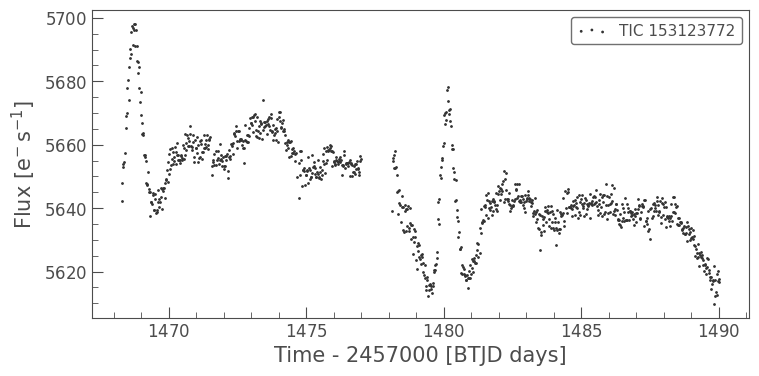

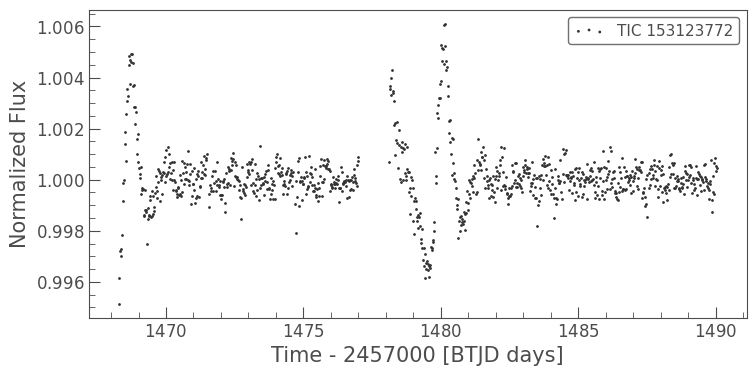

In [8]:
from astropy.io import ascii
period_days = 11.393423143561519
epoch_time = 2209.361653386310
#corrected_lc=gaussian_filter(corrected_lc, 1.4)

plt.cla()
plt.clf()
plt.show(corrected_lc.scatter())
ax = corrected_lc.flatten(81).scatter()##.fold(period_days, epoch_time=epoch_time).scatter()##.scatter()
plt.show()
clc= corrected_lc.flatten(81) #.fold(period_days, epoch_time=epoch_time)
ascii.write(clc['time',      'flux',       'flux_err'][:], './Sector6data.dat', overwrite=True, format='no_header')
#print (len(clc['time']))
#print ( clc['time'] )
#ascii.write(clc, 'values_new.dat', overwrite=True)